In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
raw_data = pd.read_csv('Data/nba_logreg.csv')

In [11]:
raw_data.head()

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


In [12]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

In [13]:
raw_data = raw_data.drop('Name', axis=1)

In [14]:
raw_data.isnull().sum()

GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [15]:
data = raw_data.dropna(axis=0)

In [16]:
data.isnull().sum()

GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

In [17]:
x = data.drop('TARGET_5Yrs', axis=1)
y = data['TARGET_5Yrs']

In [18]:
#Splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=110)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtree = DecisionTreeClassifier()

In [21]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
pred = dtree.predict(x_test)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[ 71  89]
 [ 77 162]]


              precision    recall  f1-score   support

         0.0       0.48      0.44      0.46       160
         1.0       0.65      0.68      0.66       239

    accuracy                           0.58       399
   macro avg       0.56      0.56      0.56       399
weighted avg       0.58      0.58      0.58       399



In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf = RandomForestClassifier(200)

In [27]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [28]:
rf_pred = rf.predict(x_test)

In [29]:
print(confusion_matrix(y_test,rf_pred))
print('\n')
print(classification_report(y_test,rf_pred))

[[ 75  85]
 [ 47 192]]


              precision    recall  f1-score   support

         0.0       0.61      0.47      0.53       160
         1.0       0.69      0.80      0.74       239

    accuracy                           0.67       399
   macro avg       0.65      0.64      0.64       399
weighted avg       0.66      0.67      0.66       399



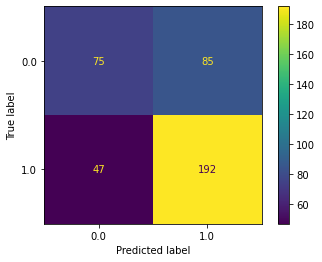

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, rf_pred, labels= rf.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = rf.classes_)
disp.plot()

## Cross Validated Data

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
scaler.fit(x)

StandardScaler()

In [36]:
x_scaled = scaler.transform(x)

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size=0.3, random_state=110)

In [38]:
dtrees = DecisionTreeClassifier()

In [39]:
dtrees.fit(x_train,y_train)

DecisionTreeClassifier()

In [40]:
predd = dtrees.predict(x_test)

In [41]:
print(confusion_matrix(y_test,predd))
print('\n')
print(classification_report(y_test,predd))

[[ 70  90]
 [ 76 163]]


              precision    recall  f1-score   support

         0.0       0.48      0.44      0.46       160
         1.0       0.64      0.68      0.66       239

    accuracy                           0.58       399
   macro avg       0.56      0.56      0.56       399
weighted avg       0.58      0.58      0.58       399



In [42]:
rdf = RandomForestClassifier(200)

In [43]:
rdf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [44]:
rdf_pred = rdf.predict(x_test)

In [45]:
print(confusion_matrix(y_test,rdf_pred))
print('\n')
print(classification_report(y_test,rdf_pred))

[[ 69  91]
 [ 46 193]]


              precision    recall  f1-score   support

         0.0       0.60      0.43      0.50       160
         1.0       0.68      0.81      0.74       239

    accuracy                           0.66       399
   macro avg       0.64      0.62      0.62       399
weighted avg       0.65      0.66      0.64       399



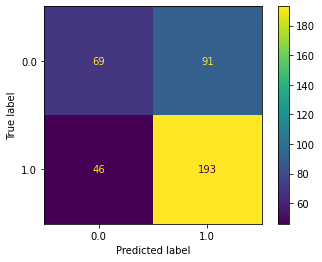

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, rdf_pred, labels= rf.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = rf.classes_)
disp.plot()